# Track 2. 뚜북이 분류

우리 연구실 수인언니가 키우는 거북이인 '뚜북이'와 뚜북이가 아닌 사진들을 분류하는 문제입니다.
데이터사이언스 분야 연구, 특히 산학 프로젝트를 하다보면 모델 구현, 개발 만큼이나 데이터 전처리에 많은 시간을 쏟곤 합니다. 데이터마다 형식이 다르고 (jpg, heic, png, tiff 등) colormap도 다를 수 있기 때문입니다.
또 실제 데이터는 그 숫자가 매우 작고 target별 데이터 불균형이 심해 분류하기 까다로운 경우가 많습니다.
Track 2를 통해 우리는 이런 현실적인 상황들에 대처하는 방법을 알아보고자 합니다. 먼저 다양한 확장자로 구성되어 있는 데이터를 하나의 확장자로 통일하는 등의 전처리를 시작해주세요. 이전에 배운 os 등 라이브러리를 사용하는 것을 권장합니다.
학습데이터 : 98장 / 평가데이터 : 21장으로 구성되어 있습니다.
target은 뚜북 / 낫뚜북으로 구성되어 있습니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! unzip -qq '/content/drive/MyDrive/뚜북이분류.zip' -d '/content/drive/MyDrive'

In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [5]:
batch_size = 10
img_height = 180
img_width = 180

In [28]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/track2/train',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 25 files belonging to 2 classes.


In [32]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/track2/test',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7 files belonging to 2 classes.


In [7]:
class_names = train_ds.class_names
print(class_names)

['ddubuk', 'not_ddubuk']


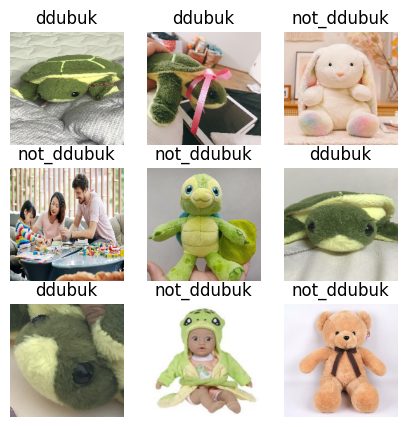

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(10, 180, 180, 3)
(10,)


In [11]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [15]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
#pixel values are now in '[0.1]
print(np.min(first_image), np.max(first_image))

0.0 0.9874771


In [17]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [18]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [33]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
3/3 [==============================] - 3s 732ms/step - loss: 0.5117 - accuracy: 0.7200 - val_loss: 0.5204 - val_accuracy: 0.8571
Epoch 2/5
3/3 [==============================] - 3s 804ms/step - loss: 0.4215 - accuracy: 0.7600 - val_loss: 0.5624 - val_accuracy: 0.7143
Epoch 3/5
3/3 [==============================] - 2s 455ms/step - loss: 0.3284 - accuracy: 1.0000 - val_loss: 0.5342 - val_accuracy: 0.5714
Epoch 4/5
3/3 [==============================] - 2s 487ms/step - loss: 0.2253 - accuracy: 1.0000 - val_loss: 0.8968 - val_accuracy: 0.7143
Epoch 5/5
3/3 [==============================] - 2s 476ms/step - loss: 0.1463 - accuracy: 0.9600 - val_loss: 0.3793 - val_accuracy: 0.8571
